# Caso COVID-19 Fase 1 

## Análisis y transformaciones al conjunto de datos original de COVID-19

In [ ]:
# C1 Caso COVID-19 Fase1
# Zuly Mayerly Alfonso Mosquera – ID 53080365 
# David Padilla – ID 8980375 
# Manuel Anduquia - ID: 8974535
# Gestión de Datos - Grupo A - 2023-1

In [10]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.dates import MonthLocator, DateFormatter

In [11]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
covid_df = pd.read_csv(url)

In [12]:
#Se utilizó la función melt para hacer un pivot y tener un mejor manejo de las columnas con fechas 
#que están en una linea de tiempo

df_covid = covid_df.melt(
    id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'],
    value_vars=covid_df.columns[4:],
    var_name='Date',
    value_name='Confirmed'
)

In [14]:
df_covid.shape

(330327, 6)

In [15]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  104013 non-null  object        
 1   Country/Region  330327 non-null  object        
 2   Lat             328041 non-null  float64       
 3   Long            328041 non-null  float64       
 4   Date            330327 non-null  datetime64[ns]
 5   Confirmed       330327 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 15.1+ MB


In [16]:
df_covid.describe().T

,count,mean,std,min,25%,50%,75%,max
Lat,328041.0,19.718719,2.591139e+01,-71.9499,3.9339,21.512583,40.463667,7.170690e+01
Long,328041.0,22.182084,7.773527e+01,-178.1165,-42.6043,20.939400,90.356300,1.780650e+02
Confirmed,330327.0,959383.569369,4.866034e+06,0.0000,680.0000,14429.000000,228517.000000,1.038027e+08


In [17]:
df_covid.describe(include='O')

,Province/State,Country/Region
count,104013,330327
unique,91,201
top,Australian Capital Territory,China
freq,1143,38862


In [18]:
# Transformar la columna "Date" de tipo 'object' a 'datetime'

df_covid['Date'] = pd.to_datetime(df_covid['Date'])

In [19]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330327 entries, 0 to 330326
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Province/State  104013 non-null  object        
 1   Country/Region  330327 non-null  object        
 2   Lat             328041 non-null  float64       
 3   Long            328041 non-null  float64       
 4   Date            330327 non-null  datetime64[ns]
 5   Confirmed       330327 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 15.1+ MB


In [20]:
df_covid.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0
1,NaN,Albania,41.15330,20.168300,2020-01-22,0
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0


In [21]:
# Cantidad de valores nulos en cada columna.

df_covid.isna().sum()

Province/State    226314
Country/Region         0
Lat                 2286
Long                2286
Date                   0
Confirmed              0
dtype: int64

In [22]:
# Copia del DF para salvaguardar la primera información y hacer la respectiva limpieza de datos.

df_cvclean = df_covid.copy()

In [23]:
df_cvclean = df_cvclean.drop(columns=['Lat', 'Long'])

In [24]:
# Reemplazar valores nulos en las columnas Country/Region y Province/State por "Unknown"
df_cvclean['Country/Region'] = df_cvclean['Country/Region'].fillna('Unknown')
df_cvclean['Province/State'] = df_cvclean['Province/State'].fillna('Unknown')

In [25]:
df_cvclean.head()

,Province/State,Country/Region,Date,Confirmed
0,Unknown,Afghanistan,2020-01-22,0
1,Unknown,Albania,2020-01-22,0
2,Unknown,Algeria,2020-01-22,0
3,Unknown,Andorra,2020-01-22,0
4,Unknown,Angola,2020-01-22,0


In [26]:
# Guardar una copia del nuevo df en CSV
df_cvclean.to_csv('df_cvclean.csv', index=False)

## 1. ¿En cuál mes se presentó el mayor número de contagios?

In [ ]:
#Se excluyen los datos de cruceros que no se consideran paises/provincias/estados.

df_cvclean = df_cvclean.query('`Country/Region` not in ["Diamond Princess", "Summer Olympics 2020", "Winter Olympics 2022", "MS Zaandam"]')

In [ ]:
df_cvclean = df_cvclean.query('`Province/State` not in ["Diamond Princess", "Grand Princess"]')

In [ ]:
df_cvclean = df_cvclean.reset_index(drop=True)

In [ ]:
df_cvclean.info()

In [ ]:
# Agrupar los datos por país y mes, y seleccionar solo la última fila de cada grupo
df_covid_last_day = df_cvclean.groupby(['Country/Region', pd.Grouper(key='Date', freq='M')]).last().reset_index()

df_covid_last_day.info()

In [ ]:
# Agrupar los datos por fecha y sumar los casos confirmados acumulados
df_covid_monthly = df_covid_last_day.groupby(pd.Grouper(key='Date', freq='M')).sum().reset_index()

In [ ]:
# Calcular la diferencia de casos confirmados acumulados entre meses consecutivos
df_covid_monthly['Confirmed_Diff'] = df_covid_monthly['Confirmed'].diff().fillna(0)

In [ ]:
print(df_covid_monthly)

In [ ]:
# Encontrar la fila con la mayor diferencia
max_diff_index = df_covid_monthly['Confirmed_Diff'].idxmax()

# Obtener el mes con la mayor diferencia
max_diff_month = df_covid_monthly.loc[max_diff_index, 'Date'].strftime('%B %Y')

# Imprimir el mes con la mayor diferencia
print(f"El mes con mayor número de casos confirmados fue: {max_diff_month}")

## 2. ¿En ese mismo mes, cuál fue el país que reportó más contagios?

In [ ]:
# Filtrar el DataFrame para obtener solo los datos de enero de 2022
Enero2022 = df_covid_last_day[df_covid_last_day['Date'] == '2022-01-31']

# Ordenar los datos por la columna 'Confirmed' en orden descendente
Enero2022_sorted = Enero2022.sort_values('Confirmed', ascending=False)

# Tomar el primer país del DataFrame ordenado (el que tiene más casos confirmados)
Mayor_Numero_Contagios = Enero2022_sorted.iloc[0]['Country/Region']

# Imprimir el resultado
print(f"El país con más contagios en enero de 2022 fue: {Mayor_Numero_Contagios}")

## 3. ¿Cuál es el país con el menor número de casos reportados hasta la fecha?

In [ ]:
# Filtrar solo la última fecha disponible para cada país
df_last_day_by_country = df_covid_last_day.groupby('Country/Region').last().reset_index()

# Ordenar los datos por la columna 'Confirmed' en orden ascendente
df_last_day_by_country_sorted = df_last_day_by_country.sort_values('Confirmed', ascending=True)

# Tomar el primer país del DataFrame ordenado (el que tiene menos casos confirmados)
pais_menor_casos = df_last_day_by_country_sorted.iloc[0]['Country/Region']
cantidad_casos = df_last_day_by_country_sorted.iloc[0]['Confirmed']

# Imprimir el resultado
print(f"El país con el menor número de casos reportados hasta la fecha es {pais_menor_casos} con un total de {cantidad_casos} casos confirmados.")


### Conclusiones

#### 1. El análisis exploratorio de datos de este dataset del COVID-19 F1 nos permitió identificar de entrada que las columnas de fecha estaban en una distribución de linea de tiempo y debiamos utilizar una función (melt) para hacer un pivot de esa información, para una mejor manipulación.  

#### 2. La columna de fecha debiamos convertirla de tipo string a date, para poder realizar los cálculos adecuadamente.

#### 3.  Se encontraron una cantidad importante de valores nulos en el columna de "Country/Region" no fueron eliminados o reemplazados con algun valor, ya que por el momento no lo consideramos relevante para el ejercicio.  

#### 4. En la limpieza de datos, identificamos que las columnas "lat" y "long" no eran relevantes para el análisis y por lo tanto fueron removidas.  

#### 5. Se excluyeron valores de cruceros que estaban referenciados dentro de las columnas "Country/Region" y "Providence/State" ya que no serían considerados como países en el análisis.

#### 6. Se utilizaron las librerias de Pandas, Numpy y Matplotlib de Python para usar las funciones requeridas para el EDA.

# FASE 2

### 2. Construir una gráfica que muestre una comparación del total de contagios de cinco países.

#### Paises seleccionados:  
Australia 🇦🇺   
Mexico 🇲🇽   
Sudáfrica 🇿🇦   
Japón 🇯🇵   
España 🇪🇸

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
# Importar dataset limpio Fase1
url = 'https://raw.githubusercontent.com/manuelanduquia81/c1-covid19-f2/main/df_cvclean.csv'
df = pd.read_csv(url)

In [29]:
# Mostrando una serie de datos de ejemplo al azar
df.sample(10)

,Province/State,Country/Region,Date,Confirmed
329234,Gansu,China,2023-03-06,1742
182450,Yunnan,China,2021-10-14,1537
8625,Unknown,Summer Olympics 2020,2020-02-20,0
86123,Unknown,Albania,2020-11-15,27830
309504,Montserrat,United Kingdom,2022-12-27,1403
235209,Unknown,Thailand,2022-04-14,3973003
88269,Mayotte,France,2020-11-22,5036
43206,Unknown,Honduras,2020-06-19,11258
1229,Hunan,China,2020-01-26,69
161674,Martinique,France,2021-08-03,22439


In [4]:
# Seleccionar las filas correspondientes a los paises en las "Country/Region" y "Confirmed"
countries = ['Australia', 'Mexico', 'South Africa', 'Spain']
subset = df[df['Country/Region'].isin(countries)][['Country/Region', 'Confirmed']]

In [5]:
# Agrupar los datos por país y sumar el total de contagios para cada país
grouped = subset.groupby('Country/Region').sum()

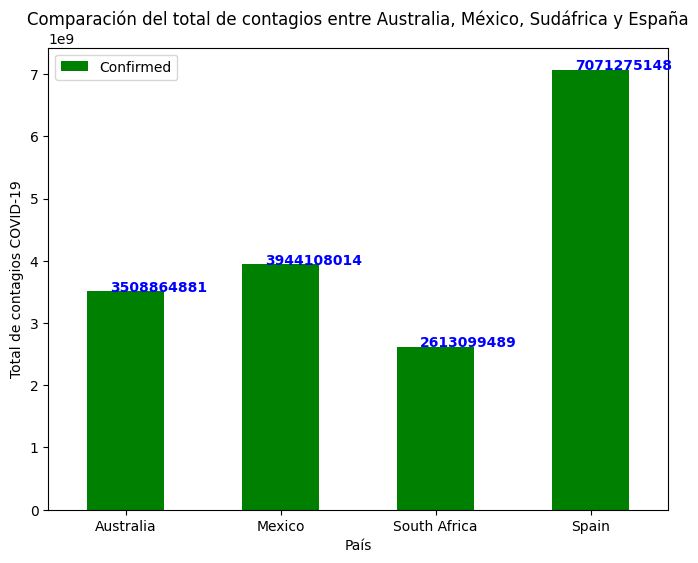

In [8]:
# Crear una gráfica de barras del total de contagios por país
ax = grouped.plot(kind='bar', figsize=(8,6), rot=0, color='green')

# Personalizar la gráfica
ax.set_xlabel('País')
ax.set_ylabel('Total de contagios COVID-19')
ax.set_title('Comparación del total de contagios entre Australia, México, Sudáfrica y España')

# Agregar etiquetas a cada barra
for i, v in enumerate(grouped.values):
    ax.text(i - 0.1, v + 1000, str(int(v)), color='blue', fontweight='bold')

# Mostrar gráfica
plt.show()

## Conclusión pregunta 2.
En la gráfica podemos evidenciar que la comparación total de contagios de COVID-19 entre Australia, México, Sudáfrica y España. España fue el país que más registró más contagios y Sudáfrica el de menor contagios reportados. 